## Abstract  
This paper is a preliminary study for an house price prediction problem. The main goal is to determine the importance of selected 100 macroeconomics variables on Russian house prices using a random forest approach.

#### Data
The dataset used in present study, are retrieved from [Kaggle's competition: Sberbank Russian Housing Market](https://www.kaggle.com/c/sberbank-russian-housing-market/data).  
It include daily time series from 2011-08-20 to 2016-05-30 of: 
* Russian Housing market  
* Russian macroeconomics features.   

In [1]:
library(ggplot2)
library(mice)
library(h2o)
h2o.init()


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: ‘h2o’

The following objects are masked from ‘package:stats’:

    cor, sd, var

The following objects are masked from ‘package:base’:

    &&, %*%, %in%, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc




H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /tmp/RtmpfqyFhW/h2o_UnknownUser_started_from_r.out
    /tmp/RtmpfqyFhW/h2o_UnknownUser_started_from_r.err


Starting H2O JVM and connecting: .............. Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         11 seconds 161 milliseconds 
    H2O cluster version:        3.15.0.4008 
    H2O cluster version age:    3 days  
    H2O cluster name:           H2O_started_from_R_root_ixr227 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   24.48 GB 
    H2O cluster total cores:    16 
    H2O cluster allowed cores:  16 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4 
    R Version:                  R version 3.4.1 

In [2]:
list.files("../input/macro.csv")
list.files("../input/test.csv")
list.files("../input/train.csv")
train <- read.csv("../input/train.csv", na.strings = "NA")
test<-read.csv("../input/test.csv", na.strings = "NA")
macro <-read.csv("../input/macro.csv", sep=",")

character(0)

character(0)

character(0)

merge training set and test set

In [3]:
test$price_doc<-NA
comb<-rbind(train, test)

Subsample 

In [4]:
macro$timestamp<-as.Date(macro$timestamp)
comb$timestamp<-as.Date(comb$timestamp)
train$timestamp<-as.Date(train$timestamp)
test$timestamp<-as.Date(test$timestamp)
m1<-sample(subset(macro,subset = timestamp >= "2011-08-20"))
m2<-sample(subset(m1, subset= timestamp<="2015-06-30"))
macrodata<-m2
p0<-sample(subset(comb,subset = timestamp >= "2011-08-20"))
p1<-sample(subset(comb, subset= timestamp<="2015-06-30"))
combset<-p1

transform a character variable in factor
- Factor[0]= who buy a house for investment  
- Factor[1]= who buy an house for living in

In [5]:
combset$type[combset$product_type=='Investment']<-0
combset$type[combset$product_type=='OwnerOccupier']<-1
type<-combset$type[1:1411]
macrodata$type<-type
macrodata$type<-as.factor(macrodata$type)

merge the variable price_doc to macroeconomic variables dataset

In [6]:
houseprice<-aggregate(combset$price_doc, by=list(combset$timestamp), FUN=mean)
names(houseprice)[names(houseprice)=='x']<-'price'
names(houseprice)[names(houseprice)=='Group.1']<-'timestamp'
price<-houseprice$price[1:1411]
macrodata$price_doc<-price

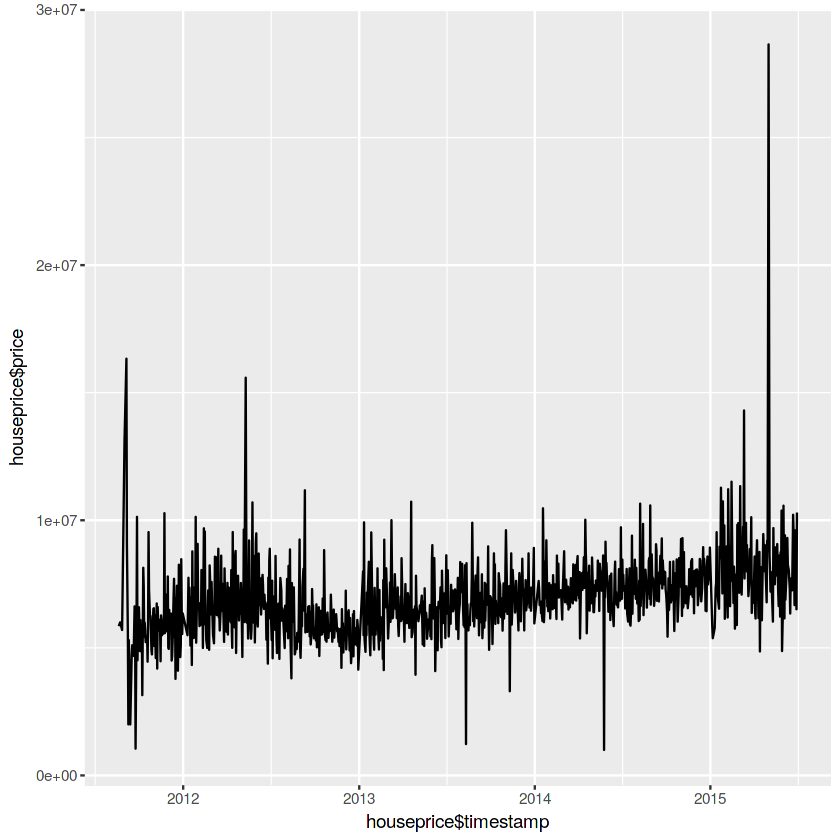

In [7]:
ggplot(data = houseprice, aes(y = houseprice$price,x = houseprice$timestamp))+geom_line()

fix the  "NA" values in price_doc with mice library

In [8]:
mice_mod <-mice(data = macrodata[99:102],method = 'rf', seed = 111)
mice_output<-complete(mice_mod)
macrodata$price_doc<-mice_output$price_doc


 iter imp variable
  1   1  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  1   2  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  1   3  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  1   4  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  1   5  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  2   1  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  2   2  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  2   3  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  2   4  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  2   5  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  3   1  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  3   2  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  3   3  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  3   4  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  3   5  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  4   1  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  4   2  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  4   3  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  4   4  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  4   5  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  5   1  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  5   2  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  5   3  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  5   4  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc
  5   5  housing_fund_sqm

Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(x = xobs, y = yobs, ntree = 1, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning me

  price_doc


reduce the dimenionality of mortgage_rate variable

In [9]:
macrodata$mg_rate[macrodata$mortgage_rate <'12.49']<- 'low_rate'
macrodata$mg_rate[macrodata$mortgage_rate >'12.49']<- 'high_rate'

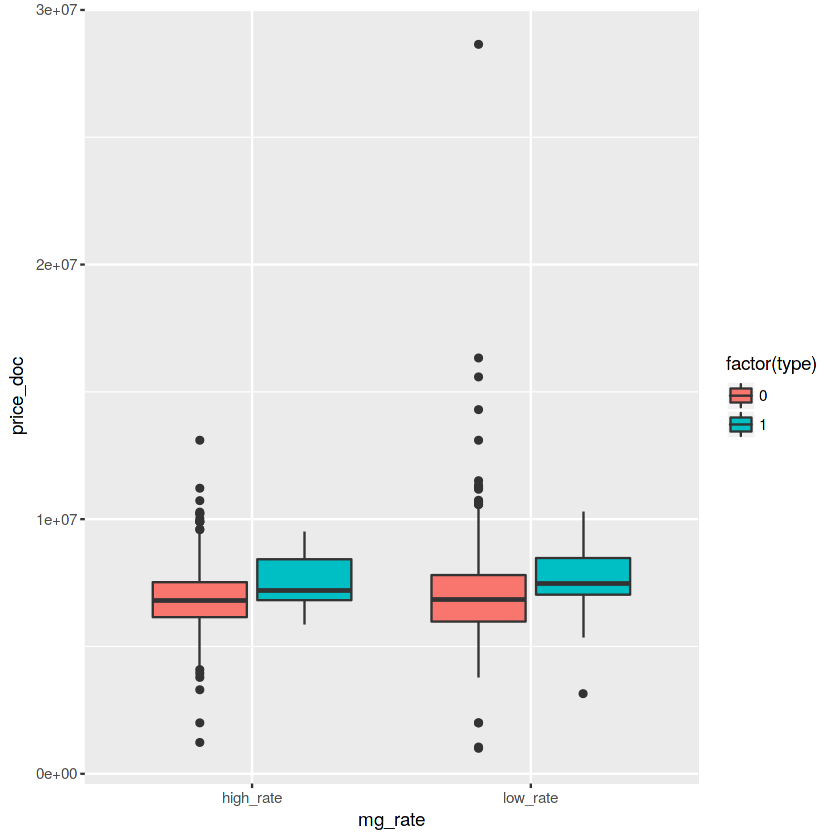

In [10]:
ggplot(macrodata,aes(y=price_doc,x=mg_rate,fill=factor(type)))+geom_boxplot()

transform the price in logPrice

In [11]:
macrodata$price_doc<-log(macrodata$price_doc,base=exp(1))
macrodata$price_doc<-as.numeric(macrodata$price_doc)

Split the macroeconomic variable dataset in:
- training set
- test set
- validation set

In [12]:
macroTrain<-macrodata[1:750,]
macroValid<-macrodata[751:1000,]
macroTest<-macrodata[1001:1411,]

In [13]:
macroTrainh2o<-as.h2o(macroTrain)
macroTesth2o<-as.h2o(macroTest)
macroValidh2o<-as.h2o(macroValid)

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Compute of the random forest model

In [14]:
rfModel<- h2o.randomForest(y="price_doc",training_frame = macroTrainh2o[-37],
                           validation_frame = macroValidh2o[-37],nfolds = 3,stopping_metric = "MSE", 
                           ntrees = 150,max_depth = 35)

Warning message in .h2o.startModelJob(algo, params, h2oRestApiVersion):
“Dropping bad and constant columns: [modern_education_share, provision_retail_space_modern_sqm, old_education_build_share, mg_rate].
Stopping metric is ignored for _stopping_rounds=0..
”

  |======================================================================| 100%


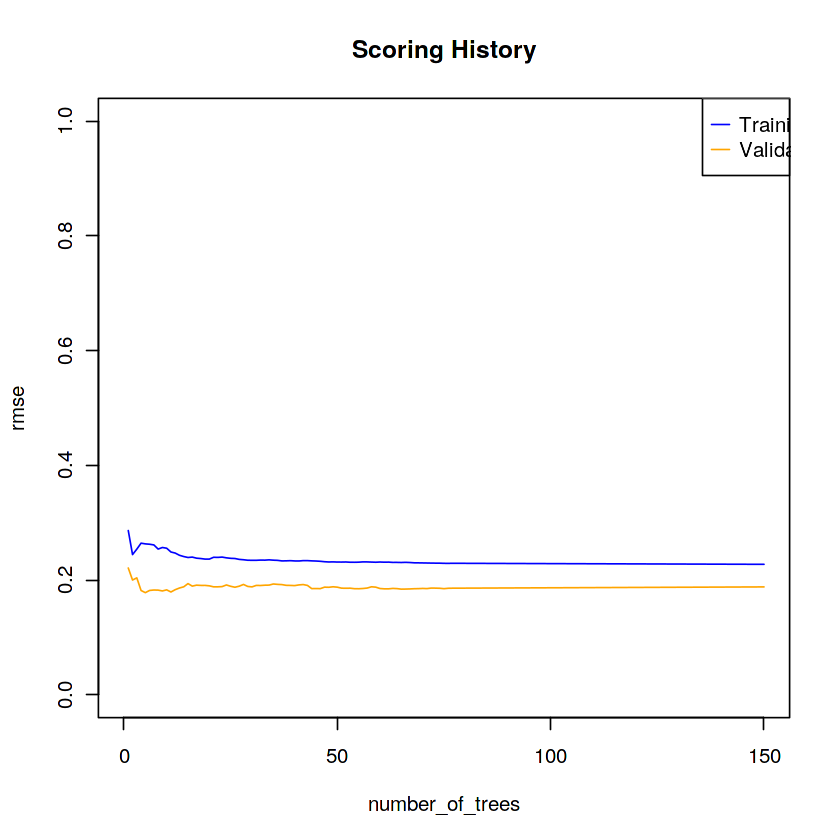

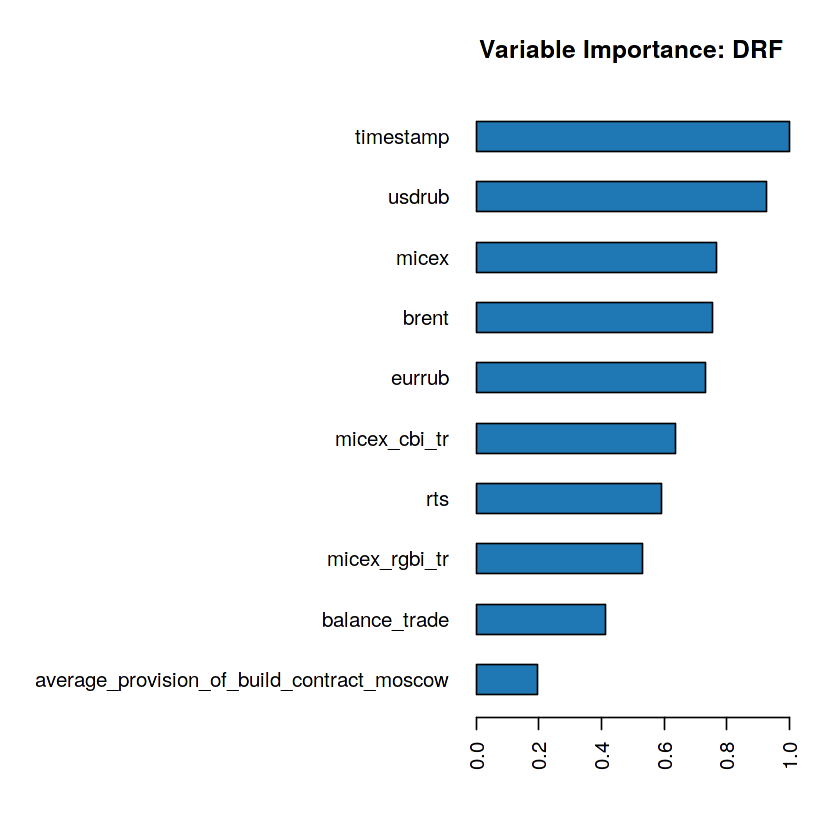

In [15]:
plot(rfModel)
h2o.varimp_plot(rfModel)

In [16]:
summary(rfModel)

Model Details:

H2ORegressionModel: drf
Model Key:  DRF_model_R_1504266394346_1 
Model Summary: 
  number_of_trees number_of_internal_trees model_size_in_bytes min_depth
1             150                      150              823812        19
  max_depth mean_depth min_leaves max_leaves mean_leaves
1        34   24.82667        395        466   432.42000

H2ORegressionMetrics: drf
** Reported on training data. **
** Metrics reported on Out-Of-Bag training samples **

MSE:  0.05168261
RMSE:  0.2273381
MAE:  0.1584011
RMSLE:  0.01377936
Mean Residual Deviance :  0.05168261


H2ORegressionMetrics: drf
** Reported on validation data. **

MSE:  0.03532694
RMSE:  0.1879546
MAE:  0.1204401
RMSLE:  0.0115068
Mean Residual Deviance :  0.03532694


H2ORegressionMetrics: drf
** Reported on cross-validation data. **
** 3-fold cross-validation on training data (Metrics computed for combined holdout predictions) **

MSE:  0.05544704
RMSE:  0.2354719
MAE:  0.1606773
RMSLE:  0.01426126
Mean Residual D